In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [50]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('EVDatabase2nd.csv')

In [51]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()


,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinIndia
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€ 42,990",NaN,"? 1,03,435"
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680",NaN
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€ 29,990","£25,995","? 67,998"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900","? 2,76,755"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€ 1,86,336","£138,830","? 2,56,939"


In [52]:
# checking the number of rows and columns
car_dataset.shape

(180, 12)

In [53]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
 11  PriceinIndia     160 non-null    object
dtypes: int64(1), object(11)
memory usage: 17.0+ KB


In [54]:
# checking the number of missing values
car_dataset.isnull().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
PriceinIndia       20
dtype: int64

In [55]:
# checking the distribution of categorical data
print(car_dataset.Drive.value_counts())
print(car_dataset.NumberofSeats.value_counts())


Front Wheel Drive    71
All Wheel Drive      64
Rear Wheel Drive     45
Name: Drive, dtype: int64
5    118
7     32
4     28
2      2
Name: NumberofSeats, dtype: int64


In [56]:
FastChargeSpeed=[]
for item in car_dataset['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
car_dataset['FastChargeSpeed']=FastChargeSpeed

Efficiency=[]
for item in car_dataset['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
car_dataset['Efficiency']=Efficiency

Range=[]
for item in car_dataset['Range']:
    Range+=[int(item.replace(' km',''))]
car_dataset['Range']=Range

TopSpeed=[]
for item in car_dataset['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
car_dataset['TopSpeed']=TopSpeed

Acceleration=[]
for item in car_dataset['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
car_dataset['Acceleration']=Acceleration

Subtitle=[]
for item in car_dataset['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
car_dataset['Subtitle']=Subtitle




In [57]:
car_dataset=car_dataset.fillna('0')

In [58]:
PriceinIndia=[]
for item in car_dataset['PriceinIndia']:
    PriceinIndia+=[int(item.replace('?','').replace(',',''))]
car_dataset['PriceinIndia']=PriceinIndia

PriceinGermany=[]
for item in car_dataset['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
car_dataset['PriceinGermany']=PriceinGermany

In [59]:
PriceinUK=[]
for item in car_dataset['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
car_dataset['PriceinUK']=PriceinUK


car_dataset.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinIndia
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,103435
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,0
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,67998
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,276755
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,256939


In [60]:
car_dataset.corr()


,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK,PriceinIndia
Subtitle,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253,-0.015715
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273,-0.070018
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669,-0.012734
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757,-0.005507
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527,-0.038414
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851,-0.012302
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985,-0.088681
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753,-0.034754
PriceinUK,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000,-0.003584
PriceinIndia,-0.015715,-0.070018,-0.012734,-0.005507,-0.038414,-0.012302,-0.088681,-0.034754,-0.003584,1.000000


In [61]:
car_dataset.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinIndia
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,103435
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,0
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,67998
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,276755
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,256939


In [62]:
#Filling Empty data of PriceinUK
import pandas as pd
pd.options.mode.chained_assignment = None

for i in range(0, len(car_dataset['PriceinUK'])):
    if (car_dataset["PriceinUK"][i]==0):
        val=car_dataset['PriceinIndia'][i]/75
        car_dataset["PriceinUK"][i]=val

#Filling Empty data of PriceinGermany

for i in range(0, len(car_dataset['PriceinGermany'])):
    if (car_dataset["PriceinGermany"][i]==0):
        val=car_dataset['PriceinIndia'][i]/84
        car_dataset["PriceinGermany"][i]=val
        
#Filling Empty data of PriceinIndian

for i in range(0, len(car_dataset['PriceinIndia'])):
    if (car_dataset["PriceinIndia"][i]==0):
        val=car_dataset['PriceinUK'][i]*75
        car_dataset["PriceinIndia"][i]=val



In [63]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Drive':{'All Wheel Drive':1,'Front Wheel Drive':0,'Rear Wheel Drive':2}},inplace=True)
car_dataset.head(170)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinIndia
0,Opel Ampera-e,58.0,7.3,150,335,173,210,0,5,42990,1379,103435
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,0,5,0,31680,2376000
2,Nissan Leaf,36.0,7.9,144,220,164,230,0,5,29990,25995,67998
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,1,5,3294,79900,276755
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,1,4,186336,138830,256939
...,...,...,...,...,...,...,...,...,...,...,...,...
165,Toyota PROACE Verso M 75 kWh,68.0,13.1,130,270,252,290,0,7,64530,2686,201452
166,Toyota PROACE Verso L 75 kWh,68.0,13.1,130,270,252,290,0,7,65385,2336,175223
167,CUPRA Born 150 kW - 62 kWh,58.0,7.3,160,350,166,440,2,5,36770,30500,153304
168,CUPRA Born 170 kW - 62 kWh,58.0,6.6,160,345,168,430,2,5,39000,31500,277839


In [64]:
X = car_dataset.drop(['Name','PriceinGermany','PriceinUK'],axis=1)
Y = car_dataset['PriceinIndia']

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# linear regression model

In [66]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [67]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [68]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [69]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


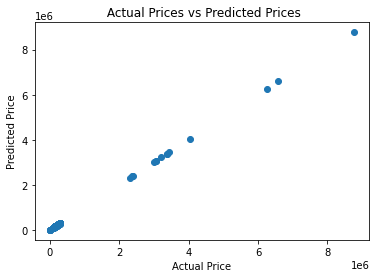

In [70]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [71]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [72]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


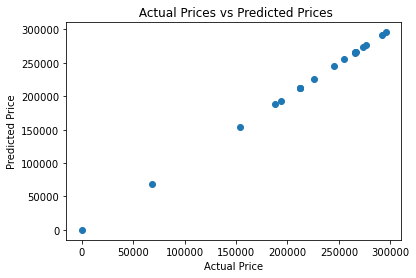

In [73]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Random Forest Regressor

In [74]:
# loading the Random Forest Regression model

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [75]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [76]:
# prediction on Training data
training_data_prediction = regressor.predict(X_train)

In [77]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9949028718574424


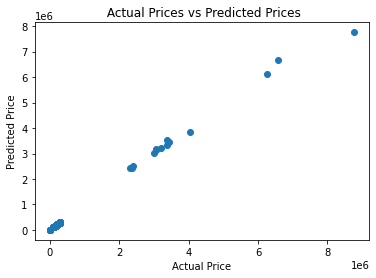

In [78]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [79]:
# prediction on Training data
test_data_prediction = regressor.predict(X_test)

In [80]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9885493907288727


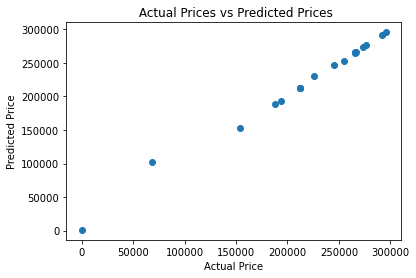

In [81]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [82]:
#Mean Absulet Error
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(Y_test,test_data_prediction))

MAE:  2660.735925925928


In [83]:
#Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(Y_test,test_data_prediction))

MSE:  65481296.8541309


In [84]:
#Root Mean Squared Error(RMSE)
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,test_data_prediction)))

RMSE:  8092.051461411433


# Lasso Regression

In [85]:
# loading the linear regression model
lass_reg_model = Lasso()

In [86]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [87]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [88]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


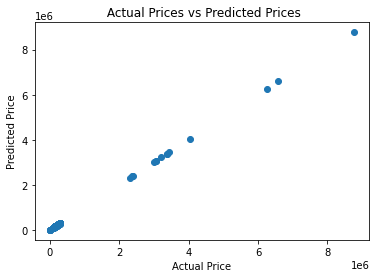

In [89]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [90]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [91]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


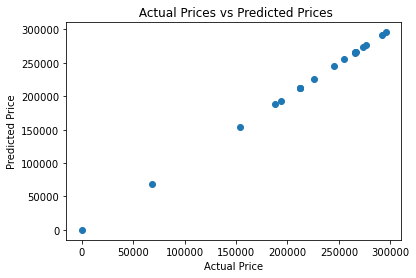

In [92]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
